In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
df=pd.read_csv("/content/LA_Nevada_2019_20.csv")
df = df[df['Year']==2019]
df.shape

(52560, 13)

In [ ]:
df = df[df['is_day']==True]

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Relative Humidity', 'Solar Zenith Angle', 'Temperature', 'is_day',
       'Datetime'],
      dtype='object')

In [ ]:
df.shape

(26792, 13)

In [ ]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Temperature,is_day,Datetime
42,2019,1,1,7,0,11,245,15,30.49,88.97,-0.4,True,01-01-2019 07:00
43,2019,1,1,7,10,17,375,34,29.84,87.36,-0.1,True,01-01-2019 07:10
44,2019,1,1,7,20,22,475,58,29.19,85.72,0.2,True,01-01-2019 07:20
45,2019,1,1,7,30,27,555,85,28.60,84.07,0.5,True,01-01-2019 07:30
46,2019,1,1,7,40,32,620,113,25.91,82.44,0.9,True,01-01-2019 07:40


In [ ]:
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [ ]:
df.index = pd.to_datetime(df['Datetime'], format='%Y.%m.%d %H:%M:%S')
df.head(2)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Temperature,is_day,Datetime
Datetime,,,,,,,,,,,,,
2019-01-01 07:00:00,2019,1,1,7,0,11,245,15,30.49,88.97,-0.4,True,2019-01-01 07:00:00
2019-01-01 07:10:00,2019,1,1,7,10,17,375,34,29.84,87.36,-0.1,True,2019-01-01 07:10:00


In [ ]:
def df_to_X_y(df, window_size=5):
    df_as_np = df['GHI'].values
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 432
X1, y1 = df_to_X_y(df, WINDOW_SIZE)

In [ ]:
X1[100:120],y1[100:120]

(array([[[412],
         [389],
         [365],
         ...,
         [ 31],
         [ 53],
         [ 78]],
 
        [[389],
         [365],
         [340],
         ...,
         [ 53],
         [ 78],
         [105]],
 
        [[365],
         [340],
         [314],
         ...,
         [ 78],
         [105],
         [134]],
 
        ...,
 
        [[ 33],
         [ 56],
         [ 82],
         ...,
         [463],
         [481],
         [499]],
 
        [[ 56],
         [ 82],
         [109],
         ...,
         [481],
         [499],
         [513]],
 
        [[ 82],
         [109],
         [138],
         ...,
         [499],
         [513],
         [525]]]),
 array([105, 134, 162, 191, 220, 248, 277, 304, 330, 356, 380, 402, 424,
        444, 463, 481, 499, 513, 525, 536]))

In [ ]:
df.shape

(26792, 13)

In [ ]:
# X_train1, y_train1 = X1[:50000], y1[:50000]
# X_val1, y_val1 = X1[50000:52000], y1[50000:52000]
# X_test1, y_test1 = X1[52000:], y1[52000:]

X_train1, y_train1 = X1[:25000], y1[:25000]
X_val1, y_val1 = X1[25000:25800], y1[25000:25800]
X_test1, y_test1 = X1[25800:], y1[25800:]

In [ ]:
model2 = Sequential()
model2.add(InputLayer((WINDOW_SIZE, 1)))
model2.add(LSTM(64))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.02))
model2.add(Dense(1, activation='relu'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

# Specify the path for saving the best model
model_checkpoint = ModelCheckpoint('model2/', save_best_only=True)

# Compile your model
model2.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=[RootMeanSquaredError()])

# Train your model with early stopping
history = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=150, callbacks=[early_stopping, model_checkpoint])


Epoch 1/150
782/782 [==============================] - 23s 20ms/step - loss: 159060.5469 - root_mean_squared_error: 398.8239 - val_loss: 1887.4503 - val_root_mean_squared_error: 43.4448
Epoch 2/150
782/782 [==============================] - 12s 15ms/step - loss: 9519.8389 - root_mean_squared_error: 97.5697 - val_loss: 1993.4536 - val_root_mean_squared_error: 44.6481
Epoch 3/150
782/782 [==============================] - 15s 20ms/step - loss: 4387.0474 - root_mean_squared_error: 66.2348 - val_loss: 1715.7596 - val_root_mean_squared_error: 41.4217
Epoch 4/150
782/782 [==============================] - 12s 15ms/step - loss: 4096.2891 - root_mean_squared_error: 64.0023 - val_loss: 1808.2766 - val_root_mean_squared_error: 42.5238
Epoch 5/150
782/782 [==============================] - 12s 15ms/step - loss: 3972.4543 - root_mean_squared_error: 63.0274 - val_loss: 1745.0464 - val_root_mean_squared_error: 41.7738
Epoch 6/150
782/782 [==============================] - 12s 16ms/step - loss: 3957.

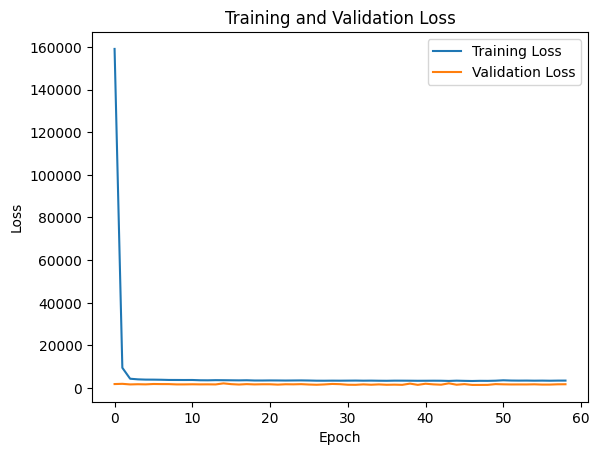

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Train Plot

In [ ]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train1})

782/782 [==============================] - 5s 6ms/step


In [ ]:
train_results.shape

(25000, 2)

In [ ]:
train_results[50:100]

,Train Predictions,Actuals
50,351.853363,356
51,376.829407,380
52,402.770599,403
53,429.285217,424
54,449.574432,444
55,464.695435,463
56,477.722412,480
57,489.816376,496
58,502.283997,510
59,513.992004,522


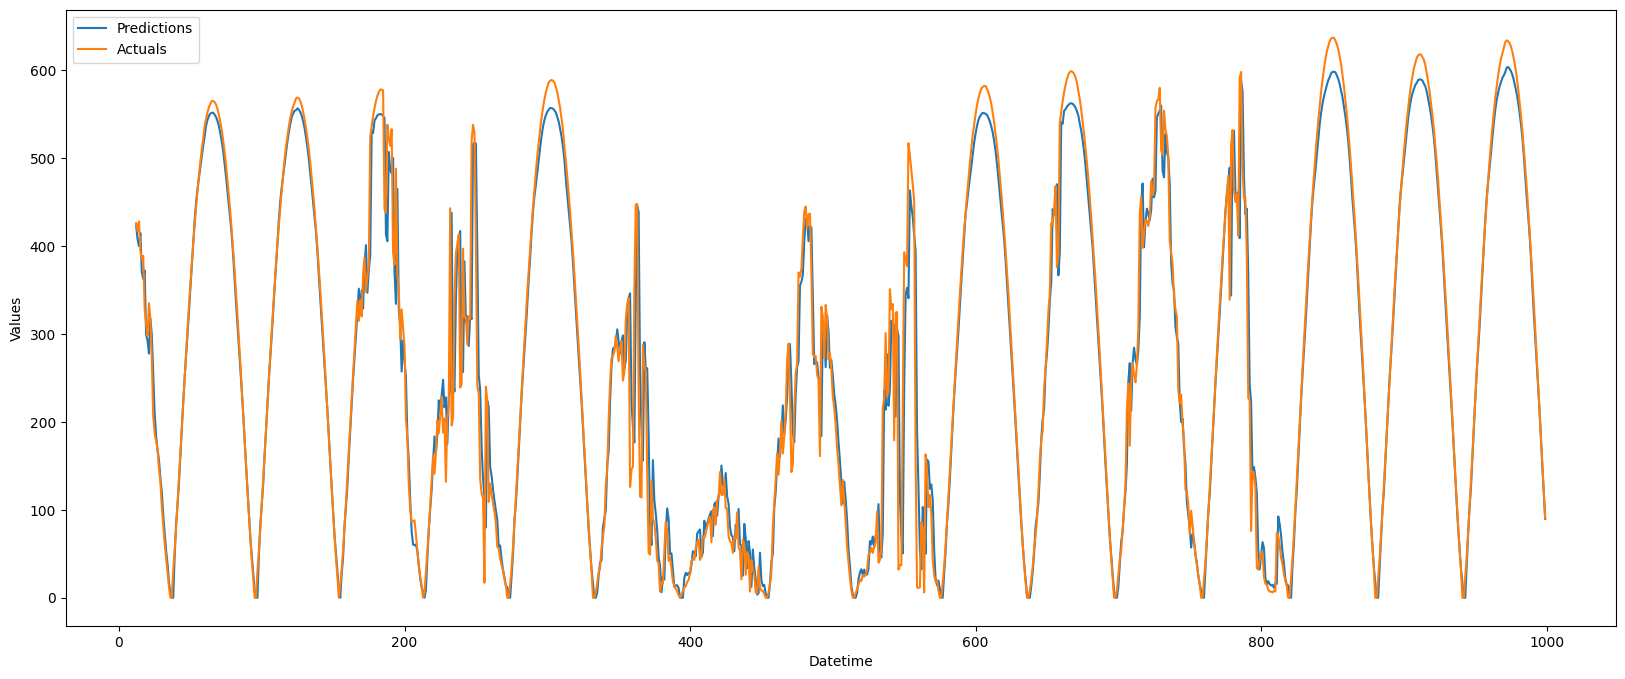

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(train_results.index[12:1000], train_results['Train Predictions'][12:1000])
plt.plot(train_results.index[12:1000], train_results['Actuals'][12:1000])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

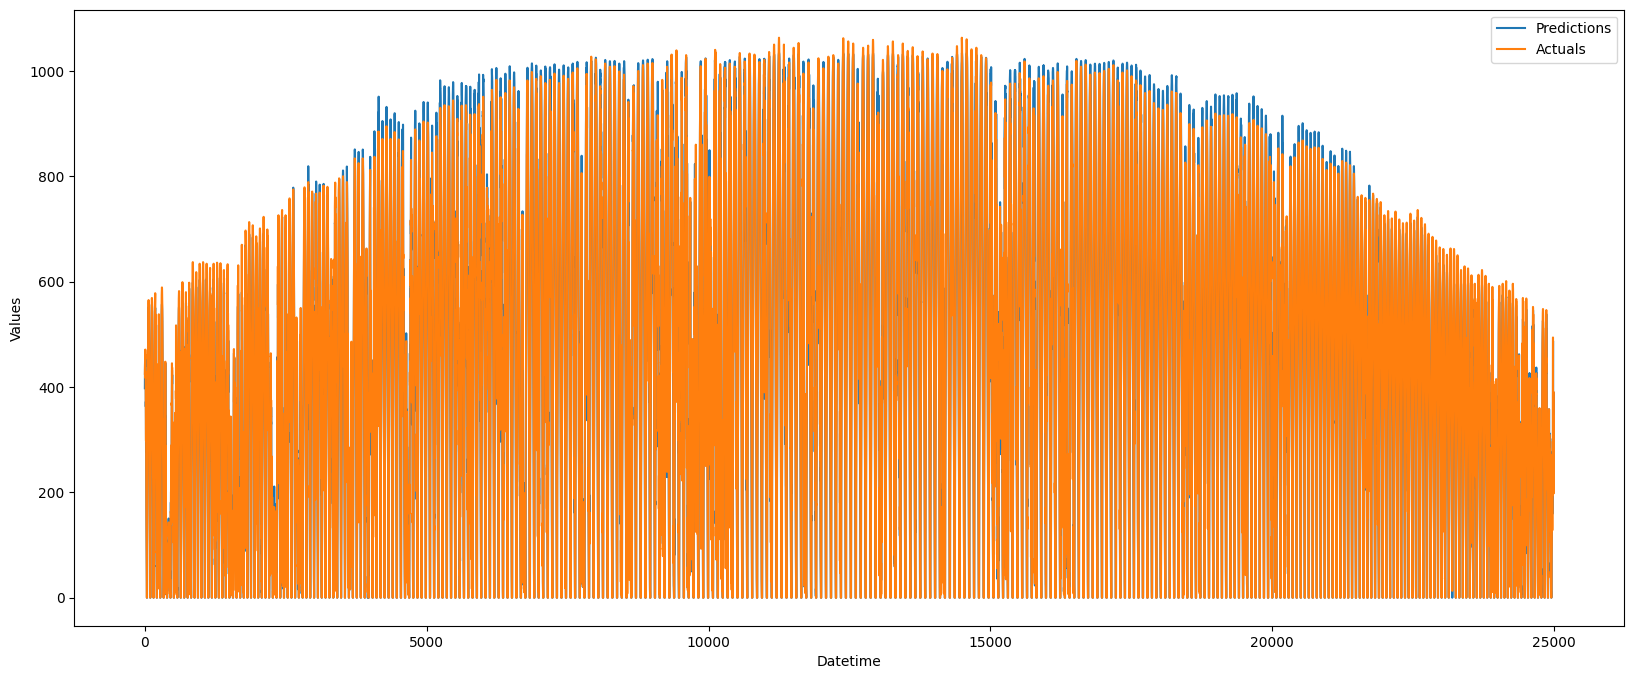

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_results.index, train_results['Train Predictions'])
plt.plot(train_results.index, train_results['Actuals'])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

## Val plot

In [ ]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'val Predictions': val_predictions, 'Actuals': y_val1})

25/25 [==============================] - 0s 11ms/step


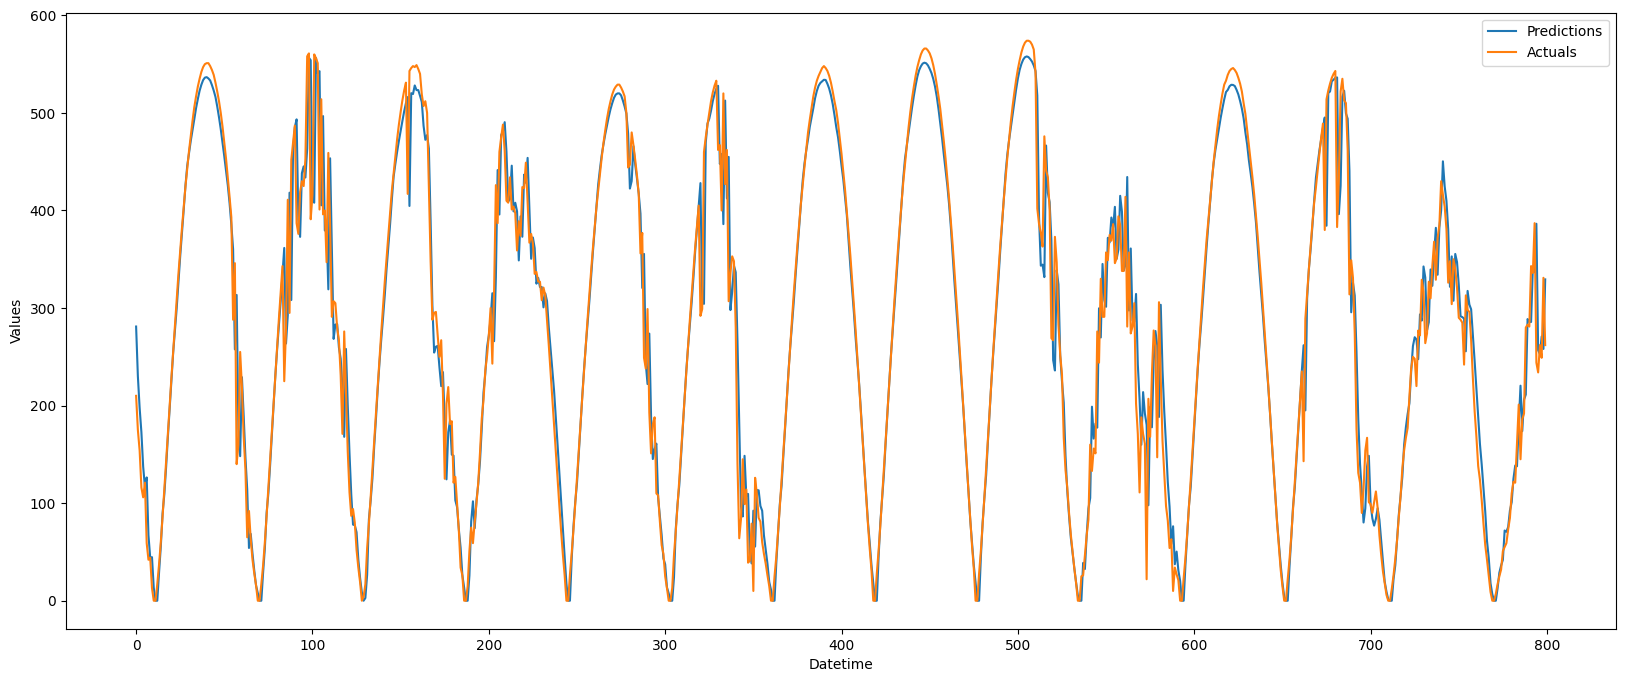

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(val_results.index, val_results['val Predictions'])
plt.plot(val_results.index, val_results['Actuals'])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

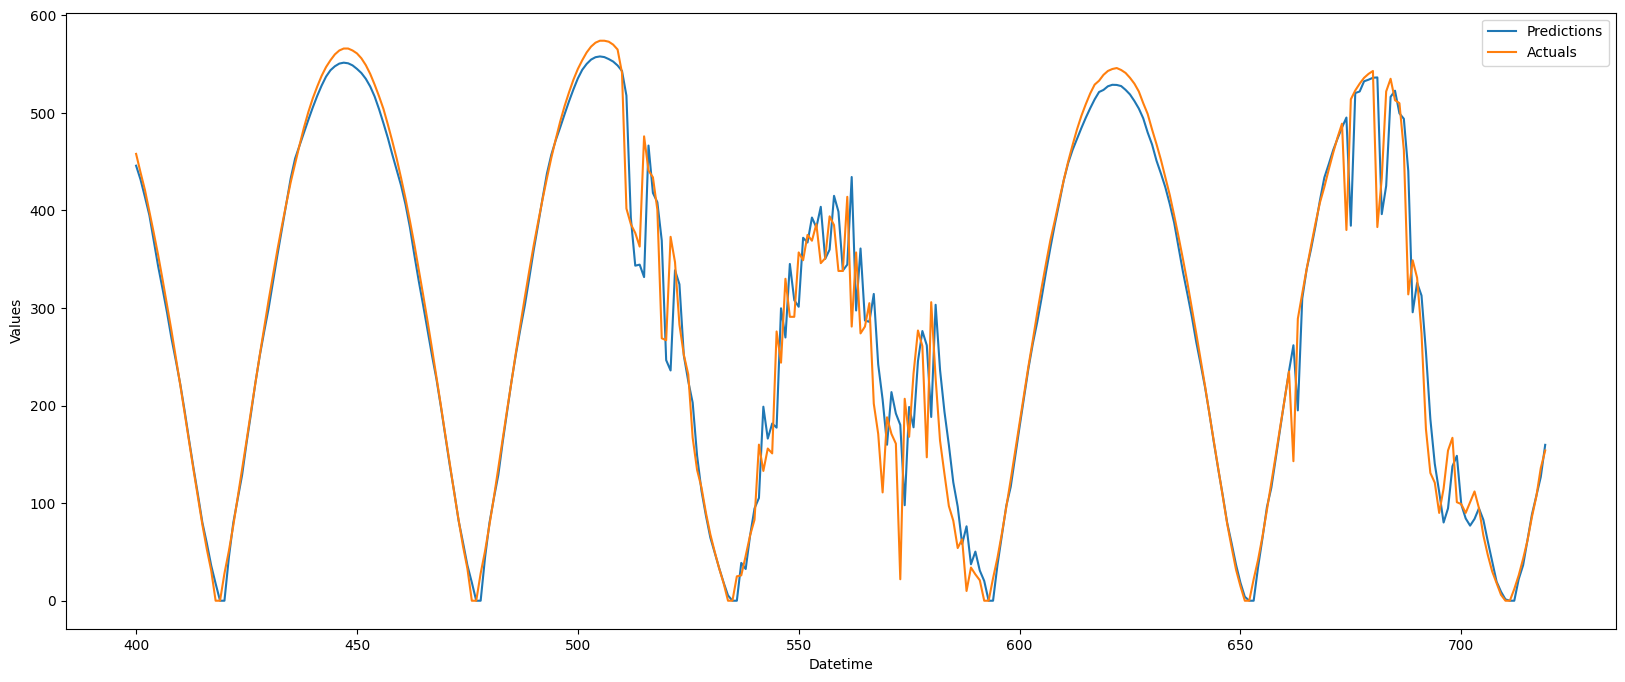

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(val_results.index[400:720], val_results['val Predictions'][400:720])
plt.plot(val_results.index[400:720], val_results['Actuals'][400:720])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

## Test Plot

In [ ]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test1})

18/18 [==============================] - 0s 11ms/step


In [ ]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
np.sqrt(mse(test_predictions,y_test1))

49.196683016643405

In [ ]:
test_results[50:80]

,Test Predictions,Actuals
50,203.926331,316
51,309.291382,238
52,244.011169,120
53,182.417557,24
54,96.953362,238
55,231.102707,278
56,259.552643,272
57,254.717728,44
58,111.713684,29
59,71.743935,132


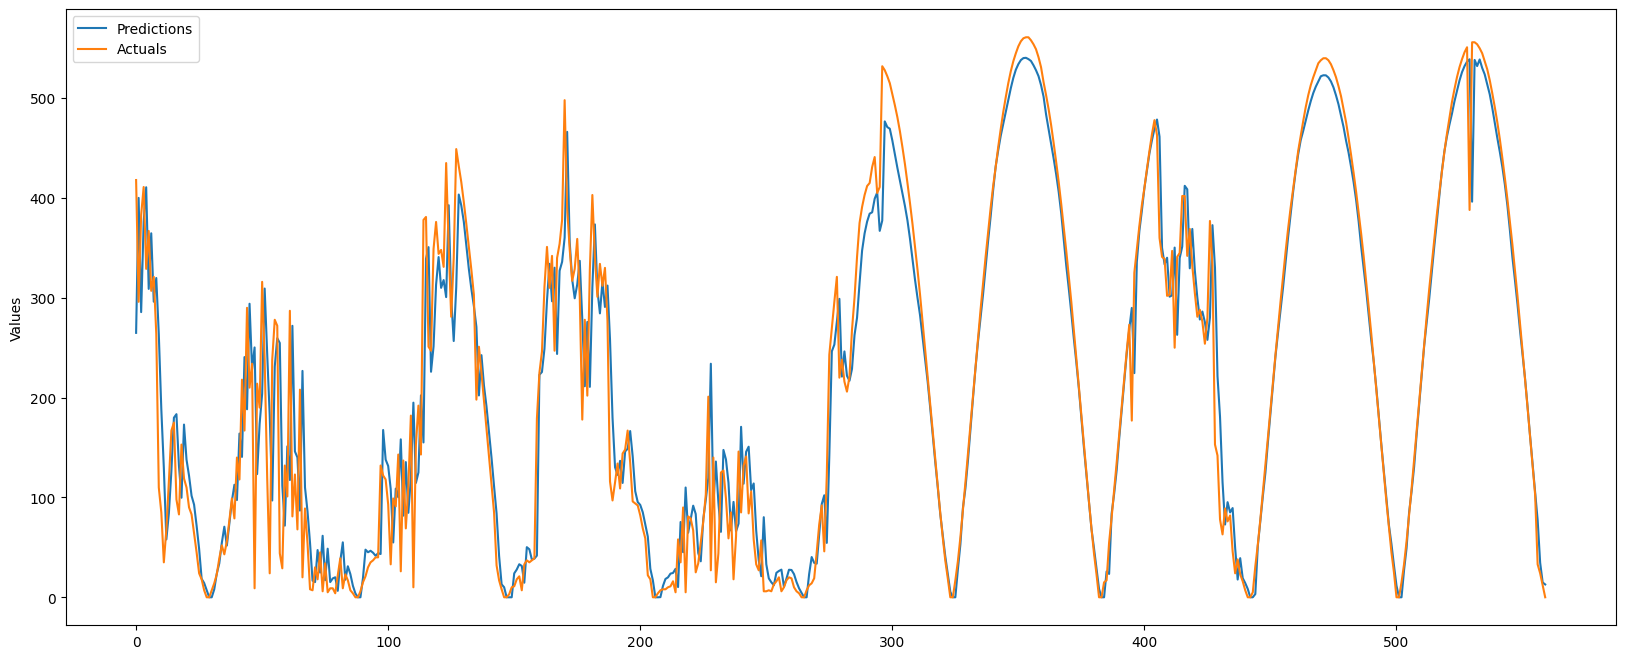

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(test_results.index, test_results['Test Predictions'])
plt.plot(test_results.index, test_results['Actuals'])
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
# plt.xlabel('Datetime')
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_predictions,y_test1))

# Calculate MSE
mse = mean_squared_error(test_predictions,y_test1)

# Calculate R2 score
r2 = r2_score(test_predictions,y_test1)

# Print the results
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


RMSE: 49.196683016643405
MSE: 2420.31361984009
R2 Score: 0.9104448857822408


# unseen pred

In [ ]:
dff=pd.read_csv("/content/LA_Nevada_2019_20.csv")
dff = dff[dff['Year']==2020]
dff = dff[dff['is_day']==True]

In [ ]:
dff.shape

(26792, 13)

In [ ]:
dff.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Temperature,is_day,Datetime
52602,2020,1,1,7,0,5,0,5,46.38,88.97,4.4,True,01-01-2020 07:00
52603,2020,1,1,7,10,17,0,17,45.42,87.36,4.7,True,01-01-2020 07:10
52604,2020,1,1,7,20,26,14,27,44.48,85.72,5.0,True,01-01-2020 07:20
52605,2020,1,1,7,30,37,107,48,43.57,84.07,5.3,True,01-01-2020 07:30
52606,2020,1,1,7,40,47,135,65,44.25,82.44,5.6,True,01-01-2020 07:40


In [ ]:
# dff.index = pd.to_datetime(dff['Datetime'])

In [ ]:
# dff

,GHI,Datetime
Datetime,,
2020-01-01 00:00:00,0,2020-01-01 00:00:00
2020-01-01 00:10:00,0,2020-01-01 00:10:00
2020-01-01 00:20:00,0,2020-01-01 00:20:00
2020-01-01 00:30:00,0,2020-01-01 00:30:00
2020-01-01 00:40:00,0,2020-01-01 00:40:00
...,...,...
2020-12-31 23:10:00,0,2020-12-31 23:10:00
2020-12-31 23:20:00,0,2020-12-31 23:20:00
2020-12-31 23:30:00,0,2020-12-31 23:30:00


In [ ]:
X1, y1 = df_to_X_y(dff, 432)

In [ ]:
test_data=X1[:2000]

In [ ]:
unseen_predictions = model2.predict(test_data).flatten()
unseen_results = pd.DataFrame(data={'Test Predictions': unseen_predictions, 'Actuals': y1[:2000]})

63/63 [==============================] - 1s 8ms/step


In [ ]:
unseen_results

,Test Predictions,Actuals
0,527.330566,534
1,538.816467,545
2,547.711182,554
3,553.903931,561
4,557.582153,567
...,...,...
1995,63.285686,309
1996,282.249298,181
1997,164.725067,243
1998,207.260040,346


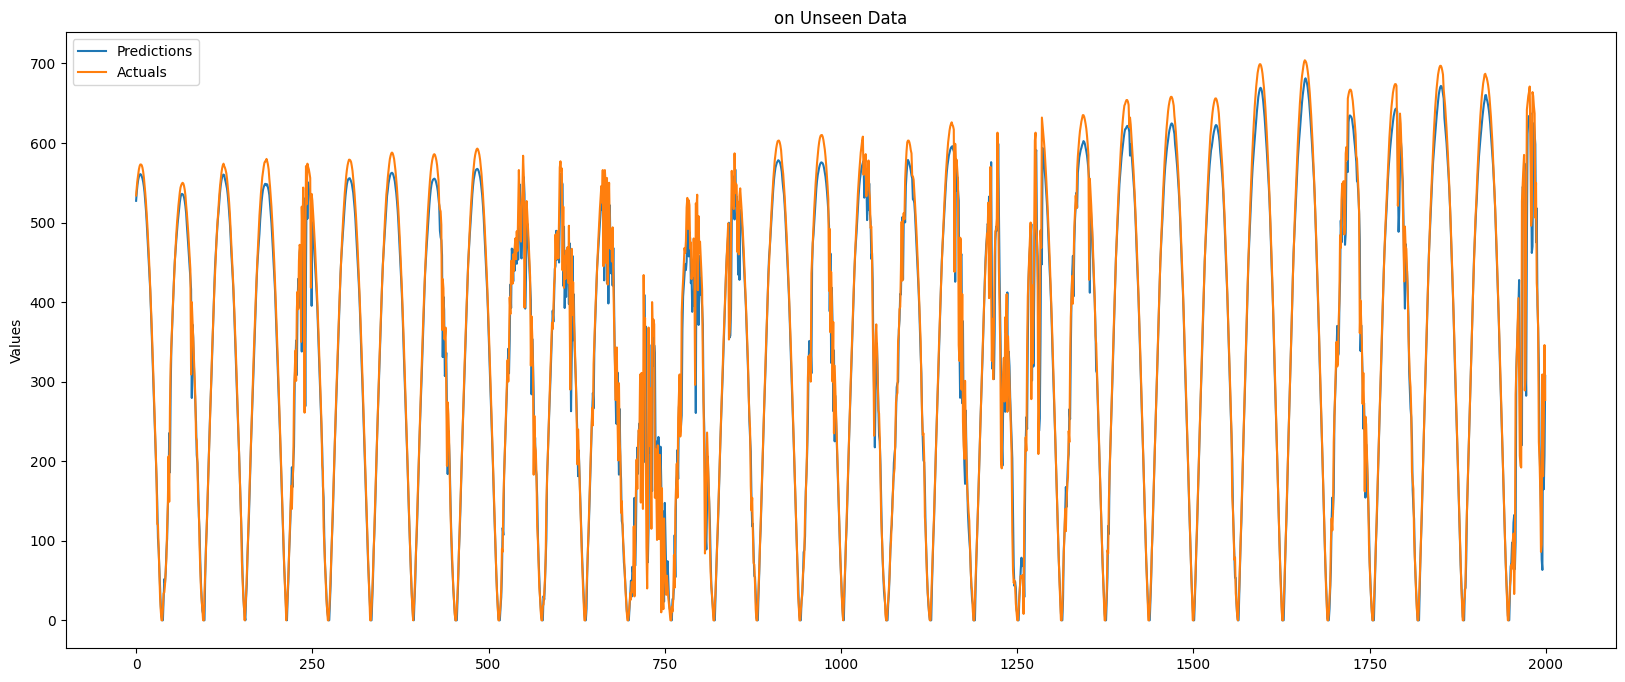

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(unseen_results['Test Predictions'])
plt.plot(unseen_results['Actuals'])
plt.xticks(rotation=0)
plt.title("on Unseen Data")
plt.ylabel('Values')
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [ ]:
plt.savefig('uni_unseen_2020.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(unseen_predictions,y1[:2000]))

# Calculate MSE
mse = mean_squared_error(unseen_predictions,y1[:2000])

# Calculate R2 score
r2 = r2_score(unseen_predictions,y1[:2000])

# Print the results
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

RMSE: 40.75342278139168
MSE: 1660.841468398854
R2 Score: 0.957225457243241
